In [1]:
#importing the necessary libraires 
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import warnings
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from PIL import Image
warnings.filterwarnings('ignore')

In [4]:
#setting the matplotlib backend , random seed and seaborn style
%matplotlib inline
np.random.seed(0)
sns.set(style='white', context='notebook', palette='deep')

In [5]:
#getting our dataframes from the csv's
train=pd.read_csv('E:\\HCL_Technical_Lead\\SIE_OSIV_HCL_TRAINING\\PYTHON_DS_DE\\Datatalsk_MLOps\\MLOps_s100rab\\MLOPS-PROJECT-2-S100RAB\DATA\\archive_train_data\\Crop_details.csv')


In [7]:
test=pd.read_csv('E:\\HCL_Technical_Lead\\SIE_OSIV_HCL_TRAINING\\PYTHON_DS_DE\Datatalsk_MLOps\\MLOps_s100rab\\MLOPS-PROJECT-2-S100RAB\\DATA\\archive_test_dataset\\testdata.csv')

croplabel
4    203
3    199
0    199
1    199
2    199
Name: count, dtype: int64

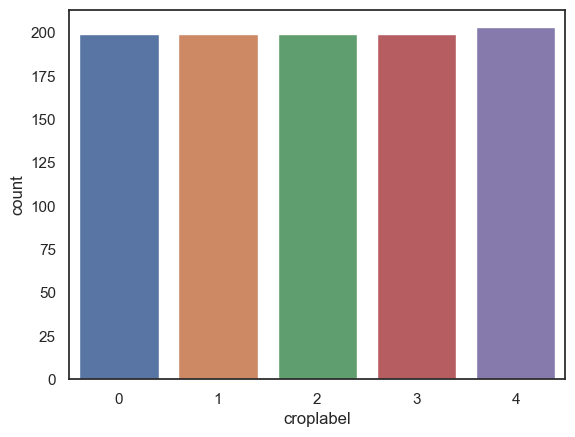

In [8]:
#getting our X_train and y_train variables from the train dataset
Y_train=train['croplabel']
X_train=train.drop(labels=['croplabel'],axis=1)
g=sns.countplot(x=Y_train)
Y_train.value_counts()

In [9]:
#checking if there is a null entry 
(X_train=='NaN').any()
(Y_train=='NaN').any()

False

In [10]:
#dropping the non needed columns
X_train=X_train.drop(columns=['crop'],axis=0)
X_train=X_train.drop(columns=['Unnamed: 0'],axis=0)

In [11]:
#defining the helper functions to extrcat the rgb data from our crop images and reshape into 28X28X3, where 3 stands for no of channels
def path_to_RGB(path :str):
   path=path.replace('/input','/MLOPS-PROJECT-2-S100RAB\\DATA\\archive_train_data\\crop_images')
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

def path_to_RGB_test(path :str):
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

In [13]:
X_train

,path
0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg
1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg
2,/kaggle/input/kag2/sugarcane/sugarcane032arot....
3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg
4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg
...,...
994,/kaggle/input/crop_images/rice/rice018a.jpeg
995,/kaggle/input/crop_images/rice/rice027a.jpeg
996,/kaggle/input/crop_images/rice/rice015a.jpeg
997,/kaggle/input/crop_images/rice/rice034a.jpeg


In [12]:
#Calling the functions and normalizing 
X_train['path']=X_train['path'].apply(path_to_RGB)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggleMLOPS-PROJECT-2-S100RAB\\DATA\\archive_train_data\\crop_images/kag2/sugarcane/sugarcane037ahs.jpeg'

In [ ]:
test['testpath']=test['testpath'].apply(path_to_RGB_test)
X_train['path']=X_train['path']/255
test['testpath']=test['testpath']/255

In [ ]:
X_train['path'].shape

In [ ]:
#basically we need to align all elements in the list , or stack them horizontally for resizing afterwards
X=[]
for x in X_train['path']:
    for j in x:
        for i in j:
            for a in i :
                X.append(a)

In [ ]:
#resized and one hot encoding of the labels
X=np.asarray(X).reshape(999,28,28,3)
Y=Y_train
Y=to_categorical(Y,num_classes=5)

In [ ]:
# CNN model is defined
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X,Y,epochs=30)

In [ ]:
#Getting the desired things from the dataframe
X_test=test['testpath']
Y_test=test['croplabel']

In [ ]:
X_test.shape

In [ ]:
#similar as done for the training data 
X_t=[]
for x in X_test:
    for j in x:
        for i in j:
            for a in i :
                X_t.append(a)

In [ ]:
#resizing 
X_t=np.asarray(X_t).reshape(51,28,28,3)

In [ ]:
Y_test=to_categorical(Y_test,num_classes=5)

In [ ]:
#evaluating the model performance
model.evaluate(X_t,Y_test)